In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_palette("colorblind")

In [2]:
data = pd.read_csv("../bench/data/full-run-j-5-feb-6-pasta-run433386-mlir-run-435312.csv")
cpu = data[data.platform == "cpu"]
gpu = data[data.platform == "gpu"]

In [3]:
cpu

,platform,benchmark,implementation,file,runtime_ms
0,cpu,mttkrp,mlir,darpa.tns,981
1,cpu,mttkrp,mlir,darpa.tns,979
2,cpu,mttkrp,mlir,darpa.tns,980
3,cpu,mttkrp,mlir,darpa.tns,979
4,cpu,mttkrp,mlir,darpa.tns,980
...,...,...,...,...,...
259,cpu,ttm,pasta,nell-2.tns,326
260,cpu,ttm,pasta,nell-2.tns,337
261,cpu,ttm,pasta,nell-2.tns,330
262,cpu,ttm,pasta,nell-2.tns,326


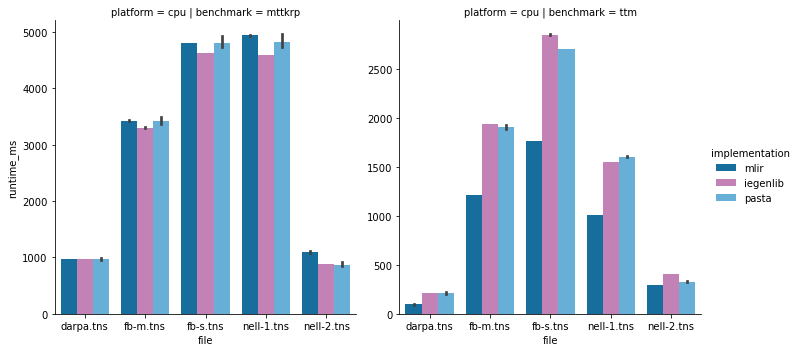

In [4]:
cpu_hue_order = ['mlir', 'iegenlib', 'pasta']
sns.catplot(data=cpu, x="file", y="runtime_ms", hue="implementation", col="benchmark", row="platform", kind="bar", palette=["C0", "C4", "C9"], hue_order=cpu_hue_order, sharey=False)

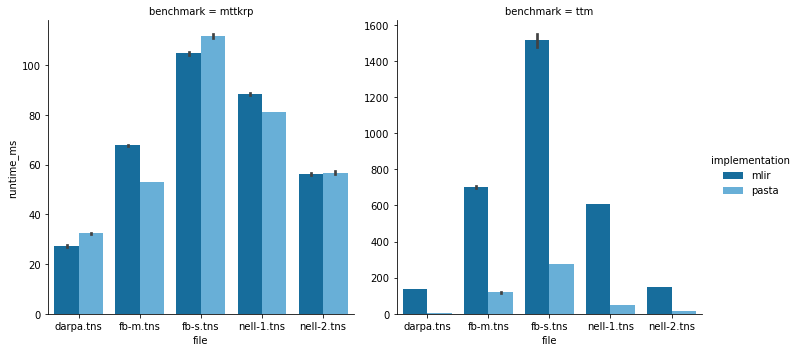

In [5]:
gpu_hue_order = ['mlir', 'pasta']
sns.catplot(data=gpu, x="file", y="runtime_ms", hue="implementation", col="benchmark", kind="bar", palette=["C0", "C9"], hue_order=gpu_hue_order, sharey=False)

In [6]:
cpu_speedup = cpu.groupby(["benchmark", "implementation", "file"]).apply(np.mean)
cpu_speedup["speedup"] = 0.0

for benchmark in ["mttkrp", "ttm"]:
	for implementation in ["iegenlib", "pasta", "mlir"]:
		cpu_speedup.loc[benchmark].loc[implementation]["speedup"] = cpu_speedup.loc[benchmark].loc["mlir"]["runtime_ms"] / cpu_speedup.loc[benchmark].loc[implementation]["runtime_ms"]

cpu_speedup = cpu_speedup.reset_index()

cpu_speedup

/home/aaron/anaconda3/envs/Assignment_0/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,benchmark,implementation,file,runtime_ms,speedup
0,mttkrp,iegenlib,darpa.tns,970.800000,1.009271
1,mttkrp,iegenlib,fb-m.tns,3306.400000,1.037684
2,mttkrp,iegenlib,fb-s.tns,4626.800000,1.037607
3,mttkrp,iegenlib,nell-1.tns,4593.200000,1.075764
4,mttkrp,iegenlib,nell-2.tns,880.400000,1.246933
5,mttkrp,mlir,darpa.tns,979.800000,1.000000
6,mttkrp,mlir,fb-m.tns,3431.000000,1.000000
7,mttkrp,mlir,fb-s.tns,4800.800000,1.000000
8,mttkrp,mlir,nell-1.tns,4941.200000,1.000000
9,mttkrp,mlir,nell-2.tns,1097.800000,1.000000


In [7]:
gpu_speedup = gpu.groupby(
    ["benchmark", "implementation", "file"]).apply(np.mean)
gpu_speedup["speedup"] = 0.0

for benchmark in ["mttkrp", "ttm"]:
    for implementation in ["pasta", "mlir"]:
        gpu_speedup.loc[benchmark].loc[implementation]["speedup"] = gpu_speedup.loc[benchmark].loc["mlir"]["runtime_ms"] / \
            gpu_speedup.loc[benchmark].loc[implementation]["runtime_ms"]

gpu_speedup = gpu_speedup.reset_index()

gpu_speedup

/home/aaron/anaconda3/envs/Assignment_0/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,benchmark,implementation,file,runtime_ms,speedup
0,mttkrp,mlir,darpa.tns,27.200000,1.000000
1,mttkrp,mlir,fb-m.tns,67.800000,1.000000
2,mttkrp,mlir,fb-s.tns,104.800000,1.000000
3,mttkrp,mlir,nell-1.tns,88.400000,1.000000
4,mttkrp,mlir,nell-2.tns,56.400000,1.000000
5,mttkrp,pasta,darpa.tns,32.333333,0.841237
6,mttkrp,pasta,fb-m.tns,53.000000,1.279245
7,mttkrp,pasta,fb-s.tns,111.666667,0.938507
8,mttkrp,pasta,nell-1.tns,81.000000,1.091358
9,mttkrp,pasta,nell-2.tns,56.666667,0.995294


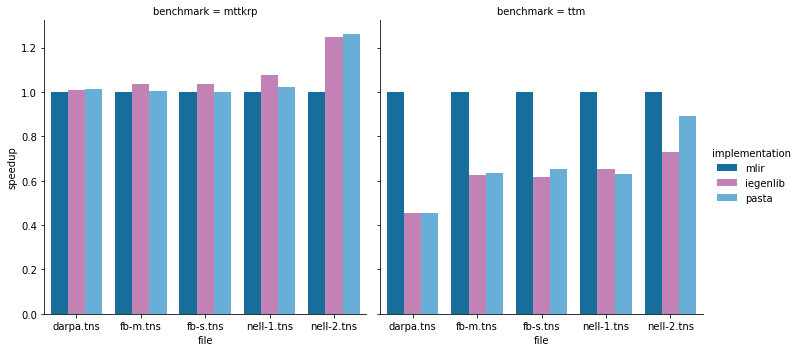

In [8]:
sns.catplot(data=cpu_speedup, x="file", y="speedup", hue="implementation", col="benchmark", kind="bar", palette=["C0", "C4", "C9"], hue_order=cpu_hue_order)

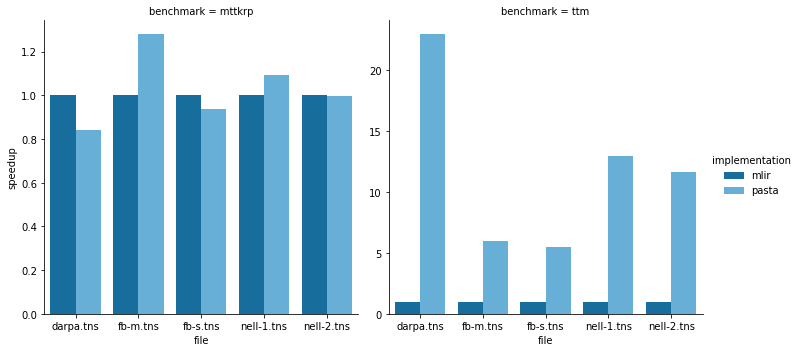

In [9]:
sns.catplot(data=gpu_speedup, x="file", y="speedup", hue="implementation", col="benchmark", kind="bar", palette=["C0", "C9"], hue_order=gpu_hue_order, sharey=False)